Seaborn - matplotlib add on toolkits

to output plots in the Jupyter notebook: `%matplotlib inline`

# 9.1 A brief matplotlib API Primer


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
data = np.arange(10)

plt.plot(data)


## Figures and Subplots

Plots in matplotlib reside within a Figure object.
To create a new figure use plt.figure

`fig = plt.figure()`

figsize will guarantee the figure has a certain size and aspect ratio of saved to disk

You can't make a plot with a blank figure. You have to create subplots using add_subplot

`ax1 = fig.add_subplot(2, 2, 1)`

It is preferred to use the axis methods over the top-level plotting functions like plt.plot


In [ ]:
fig = plt.figure()

# Figure should be 2 x 2, up to 4 plots in total, 1st figure been selected
# plot axis objects have various methods that create different types of plots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

ax2.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")


The objects returned by fig.add_subplot here are AxesSubplot objects.
You can directly plot on the other empty subplots by calling each one's instance method


In [ ]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)

ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))


In [ ]:
fig


Use plt.subplots method to create a new figure and returns a NumPy array containing the created subplot objects


In [ ]:
fig, axes = plt.subplots(2, 3)

axes
# Same as when create ax1 to ax6 elements with fig.add_subplot()


## Adjust spacing around subplots


In [ ]:
# Shrink the spacing all the way to 0
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )

fig.subplots_adjust(wspace=0, hspace=0)


## Colors, Markers and Line Styles

plot x versus y with green dashes
`ax.plot(x, y, linestyle="--"l color="green")`

Line plots can additionally have markers to highlight the actual data points


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(10)
y = np.random.standard_normal(10)

ax.plot(x, y, linestyle="--", marker=".", label="default")

# Use drawstyle to change how the sequence is interpolated
ax.plot(x, y, drawstyle="steps-post", label="steps-post")

# Call legend method to show the labels
ax.legend()


## Ticks, Labels and Legends

Most kinds of plot decorations can be accessed through methods on matplotlib axes objects.
xlim, xticks, xticklabels

Controls the plot range, tick locations and tick labels

All such methods act on the active or most recently created AxesSubplot

### Setting the title, axis labels, ticks and tick labels


In [ ]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# Use set_xticks and set_xticklabels to place the ticks along the datarange
# the rotation option sets the x tick label at 30 degree rotaton
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)

# Give a name to the x-axis
ax.set_xlabel("Stages")

# Set the subplot title
ax.set_title("My first matplotlib plot")

# Use set method to batch setting plot properties
ax.set(title="My first matplot plot", xlabel="Stages", ylabel="Value")


### Adding Legends

Pass the label argument when adding each piece of the plot


In [ ]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", label="two", linestyle="--")
ax.plot(
    np.random.randn(1000).cumsum(), color="black", label="three", linestyle="dotted"
)

ax.legend(loc="upper right")


In [ ]:
ax.legend?

## Annotations and Drawings on a Subplot

Plot annotations: text, arrows, other shapes
Add annotations with `text`, `arrow` and `annotate` functions

`ax.text(a, y, 'Hello world', family='monospace', fontsize=10)`


In [ ]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("./datasets/spx.csv", index_col=0, parse_dates=True)

spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Sterns Fils"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]

# ax.annotate method can draw labels at the indicated x and y coordinates
for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=2, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )

# Zoom in on 2007 - 2010, manually set the start and end boundaries for the plot
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008 to 2001")


#### Drawing shapes

matplotlib `patches` object represent common shapes
Full set can be found in `matplotlib.patches`

To add a shape to a plot, you create the patch object and add it to a subplot ax by passing the patch to ax.add_patch


In [ ]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.34, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


## Saving Plots to File

Save the active figure using figure object's `savefig` instance method.

`fig.savefig('figpath.pmg', dpi=400)`

The fie type is inferred from the file extension


## matplotlib Configuration

Use `plt.rc` method to modify the configuration
`plt.rc('figure', figsize=(10,10))`

First argument to rc is the component you wish to customize
Followed by a sequence of keyword arguments indicating the new parameters

`plt.rc('font', family='monospace', weight='bold', size=8)`

All current configuration settings can be found in `plt.rcParams`


In [ ]:
plt.rcParams


# 9.2 Plotting with pandas and seaborn


## Line Plots


<AxesSubplot: >

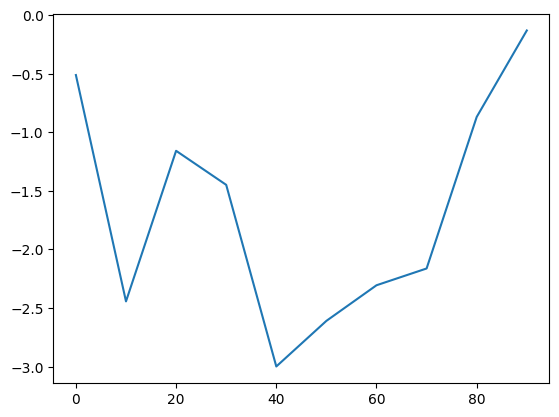

In [16]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()


Series.plot method arguments

| Argument  | Description                                                                                                     |
| --------- | --------------------------------------------------------------------------------------------------------------- |
| label     | Label for plot legend                                                                                           |
| ax        | matplotlib subplot object to plot on, if nothing passed, use active matplotlib subplot                          |
| style     | style string, like 'ko--' to be passed to matplotlib                                                            |
| alpha     | The plot fill opacity (from 0 to 1)                                                                             |
| kind      | Can be "area", 'bar', 'barh', 'density', 'hist', 'kde', 'line' or 'pie', default to 'line'                      |
| figsize   | Size of the figure object to create                                                                             |
| logx      | Pass True for logarithmic scaling on the x axis; pass 'sym' for symmetric logarithm that permits negative value |
| logy      | Pass True for logarithmic scaling on the y axis                                                                 |
| title     | title to use ofr the plot                                                                                       |
| use_index | use the object index for tick labels                                                                            |
| rot       | rotation of tick labels (0 to 360)                                                                              |
| xticks    | Values to use for x-axis ticks                                                                                  |
| yticks    | Values to use for y-axis ticks                                                                                  |
| xlim      | x-axis limits (e.g. [0, 10])                                                                                    |
| ylim      | y-axis limits                                                                                                   |
| gird      | display axis grid, off by default                                                                               |


DataFrame's plot method plots each of its columns as a different line on the same subplot, creating a legend automatically.


<AxesSubplot: >

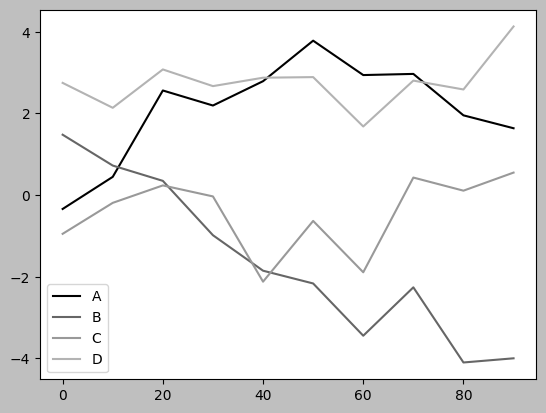

In [3]:
df = pd.DataFrame(
    # cumsum(0) means accumulate summary along the columns
    np.random.standard_normal((10, 4)).cumsum(0),
    columns=["A", "B", "C", "D"],
    index=np.arange(0, 100, 10),
)

plt.style.use("grayscale")

df.plot()


DataFrame specific plot arguments

| Argument     | Description                                                                 |
| ------------ | --------------------------------------------------------------------------- |
| subplots     | Plot each DataFrame column in a separate subplot                            |
| layouts      | 2-tuple (rows, columns) providing layout of subplots                        |
| sharex       | If subplots = True, share the same x-axis linking ticks and limits          |
| sharey       | if subplots = True, share the same y-axis                                   |
| legend       | Add a subplot legend (True by default)                                      |
| sort_columns | Plot columns in a alphabetical order, by default uses existing column order |


## Bar Plots

`plot.bar()` and `plot.barh()` make vertical and horizontal bar plots.
Series or DataFrame index will be used as the x(bar) or y(barh) ticks


<AxesSubplot: >

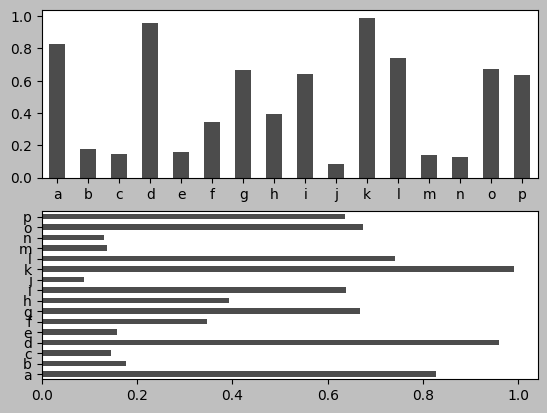

In [17]:
fix, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7, rot=0)


data.plot.barh(ax=axes[1], color="black", alpha=0.7)


With a DataFrame, bar plots group the values in each row in bars, side by side, for each value.


<AxesSubplot: >

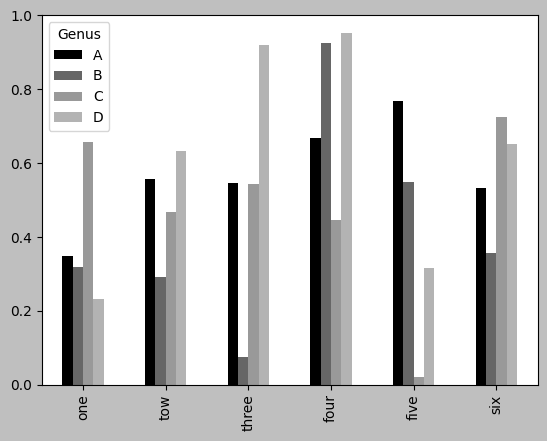

In [21]:
df = pd.DataFrame(
    np.random.uniform(size=(6, 4)),
    index=["one", "tow", "three", "four", "five", "six"],
    columns=pd.Index(
        ["A", "B", "C", "D"],
        name="Genus",
    ),
)

df.plot.bar()

<AxesSubplot: >

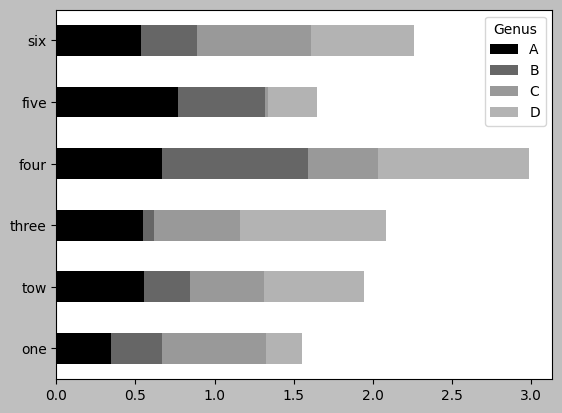

In [22]:
df.plot.barh(stacked=True)

In [23]:
tips = pd.read_csv('datasets/tips.csv')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='day'>

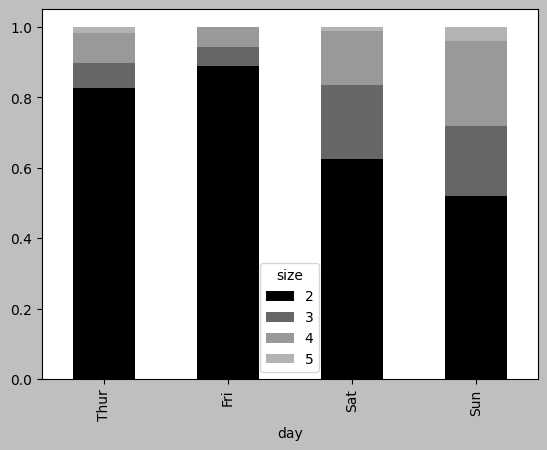

In [31]:
# Use pandas.crosstab() function to compute a frequency table from two dataframe columns
party_counts = pd.crosstab(tips["day"], tips["size"])

party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

# Remove the one and six person party
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis='columns'), axis='index')

party_pcts.plot.bar(stacked=True)

In [30]:
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [29]:
party_counts.sum(axis='columns')

day
Thur    58
Fri     18
Sat     85
Sun     75
dtype: int64

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

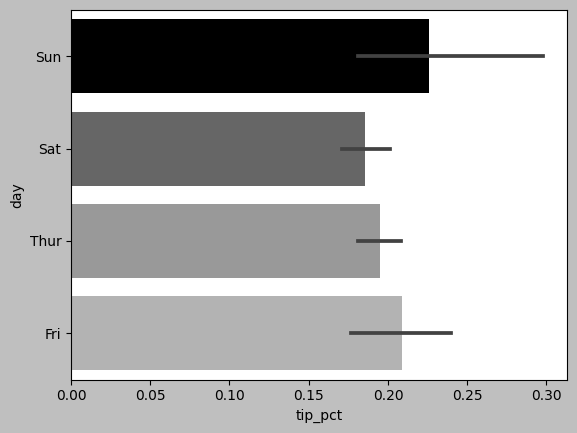

In [33]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')